In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Ensure the dataset is the same every time
np.random.seed(42)


In [5]:
# Number of tumor regions
num_regions = 400


In [6]:
# Define 4 types of regions with different characteristics
region_types = ['immune_active', 'hypoxic', 'stromal_heavy', 'mixed']


In [7]:
# Initialize empty lists
x_coords = []
y_coords = []
immune = []
support = []
oxygen = []
blood = []
growth = []
region_label = []

# Loop to create 400 regions
for i in range(num_regions):
    # Randomly assign a hidden type
    r_type = np.random.choice(region_types)

    # Coordinates
    x_coords.append(np.random.uniform(0, 100))
    y_coords.append(np.random.uniform(0, 100))

    # Features depend on type
    if r_type == 'immune_active':
        immune.append(np.random.normal(80, 5))
        support.append(np.random.normal(40, 5))
        oxygen.append(np.random.normal(70, 5))
        blood.append(np.random.normal(60, 5))
        growth.append(np.random.normal(50, 5))
    elif r_type == 'hypoxic':
        immune.append(np.random.normal(30, 5))
        support.append(np.random.normal(50, 5))
        oxygen.append(np.random.normal(20, 5))
        blood.append(np.random.normal(30, 5))
        growth.append(np.random.normal(60, 5))
    elif r_type == 'stromal_heavy':
        immune.append(np.random.normal(40, 5))
        support.append(np.random.normal(80, 5))
        oxygen.append(np.random.normal(60, 5))
        blood.append(np.random.normal(50, 5))
        growth.append(np.random.normal(40, 5))
    else:  # mixed
        immune.append(np.random.normal(60, 5))
        support.append(np.random.normal(60, 5))
        oxygen.append(np.random.normal(50, 5))
        blood.append(np.random.normal(50, 5))
        growth.append(np.random.normal(50, 5))

    region_label.append(r_type)  # for later evaluation (optional)


In [8]:
# Combine into a single table
df = pd.DataFrame({
    'x': x_coords,
    'y': y_coords,
    'immune': immune,
    'support': support,
    'oxygen': oxygen,
    'blood': blood,
    'growth': growth,
    'type': region_label  # optional
})

# Show first 5 rows
df.head()


,x,y,immune,support,oxygen,blood,growth,type
0,79.654299,18.343479,42.369304,86.842251,55.415866,49.379264,29.945186,stromal_heavy
1,70.807258,2.058449,57.535983,57.095609,47.374151,47.143099,45.379586,mixed
2,0.706631,2.306243,17.804471,53.017206,18.744780,29.180664,52.618352,hypoxic
3,59.241457,4.645041,67.434905,54.245032,51.878490,46.996807,48.541531,mixed
4,24.102547,68.326352,65.651141,61.865595,48.067635,44.206149,52.830564,mixed


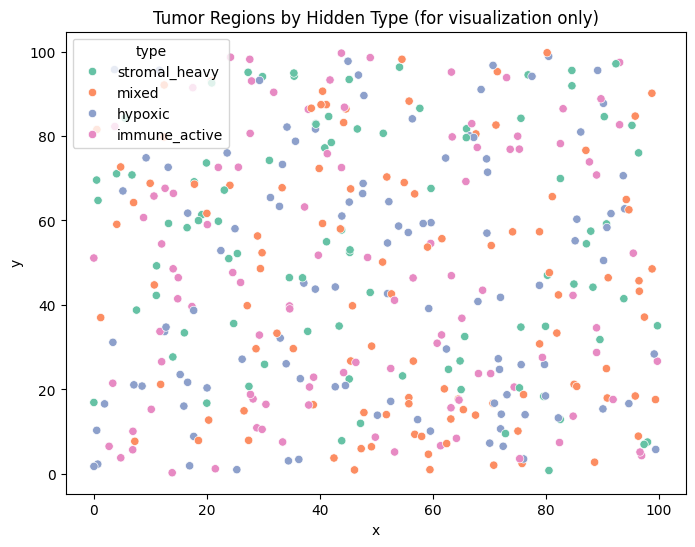

In [9]:
# Scatter plot of all regions using coordinates
plt.figure(figsize=(8,6))
sns.scatterplot(x='x', y='y', hue='type', data=df, palette='Set2')
plt.title("Tumor Regions by Hidden Type (for visualization only)")
plt.show()


In [10]:
# Save CSV to download
df.to_csv("synthetic_tme_data.csv", index=False)


In [11]:
# Data for clustering (remove type)
X = df[['immune', 'support', 'oxygen', 'blood', 'growth']]


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
from sklearn.cluster import KMeans

# Decide number of clusters
k = 4  # We “know” 4 hidden types

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [14]:
df['cluster'] = clusters
df.head()


,x,y,immune,support,oxygen,blood,growth,type,cluster
0,79.654299,18.343479,42.369304,86.842251,55.415866,49.379264,29.945186,stromal_heavy,0
1,70.807258,2.058449,57.535983,57.095609,47.374151,47.143099,45.379586,mixed,3
2,0.706631,2.306243,17.804471,53.017206,18.744780,29.180664,52.618352,hypoxic,2
3,59.241457,4.645041,67.434905,54.245032,51.878490,46.996807,48.541531,mixed,3
4,24.102547,68.326352,65.651141,61.865595,48.067635,44.206149,52.830564,mixed,3


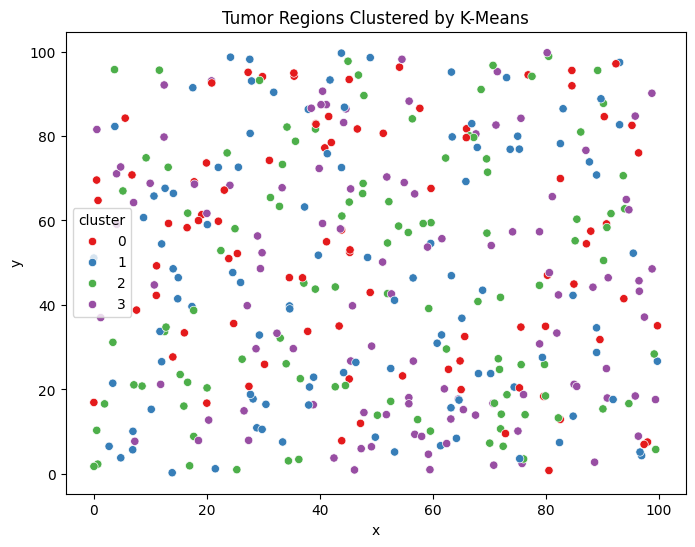

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='x', y='y', hue='cluster', data=df, palette='Set1')
plt.title("Tumor Regions Clustered by K-Means")
plt.show()


In [16]:
# Crosstab of hidden type vs discovered cluster
pd.crosstab(df['type'], df['cluster'])


cluster,0,1,2,3
type,,,,
hypoxic,0,0,106,0
immune_active,0,102,0,0
mixed,0,0,0,104
stromal_heavy,85,0,0,3


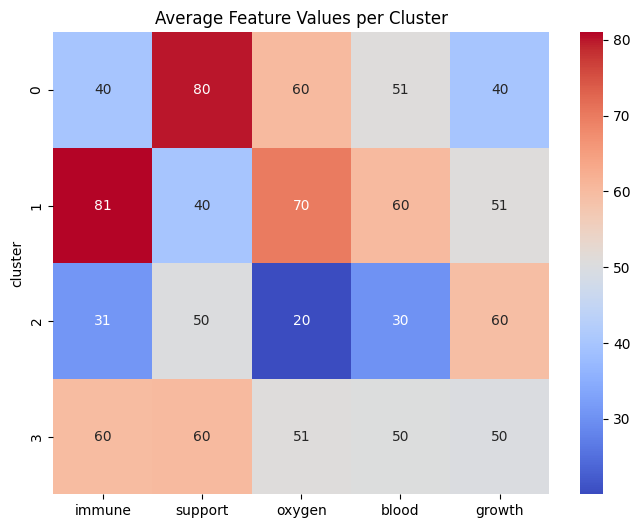

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.groupby('cluster')[['immune','support','oxygen','blood','growth']].mean(), annot=True, cmap='coolwarm')
plt.title("Average Feature Values per Cluster")
plt.show()


In [18]:
df.to_csv("tme_clusters.csv", index=False)
